In [2]:
import pandas as pd
!pip install openpyxl

In [3]:
#Lendo o arquivo de roubos

filename = r"E:\HeatMap_RouboSP\dados_roubo_celular_sp_2020.xlsx"
df_roubos = pd.read_excel(filename)

In [4]:
#Mostrar os dados com a função head

df_roubos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2020,1646238,1646238/2020,01/11/2020 00:03:07,01/11/2020 00:01:32,31/10/2020,16:30,A TARDE,31/10/2020,01/11/2020 00:03:07,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,ASUS
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,EQT9081,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE


In [5]:
#Mostrar apenas os dados de latitude e longitude (primeiro copiei o nome das colunas: 'LATITUDE', 'LONGITUDE') para ver se tem linha vazia

df_roubos[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
0,NaN,NaN
1,-23.686360,-46.765585
2,-23.612298,-46.609388
3,-23.640576,-46.760755
4,-23.593117,-46.606192
...,...,...
16367,NaN,NaN
16368,NaN,NaN
16369,NaN,NaN
16370,NaN,NaN


In [6]:
#Vamos eliminar os dados de lat lon nulos usando a função dropna com parâmetro subset

df_roubos = df_roubos.dropna(subset=['LATITUDE','LONGITUDE'])

df_roubos[['LATITUDE','LONGITUDE']]

,LATITUDE,LONGITUDE
1,-23.686360,-46.765585
2,-23.612298,-46.609388
3,-23.640576,-46.760755
4,-23.593117,-46.606192
5,-23.593117,-46.606192
...,...,...
16363,-23.627340,-46.716842
16364,-23.635372,-46.492679
16365,-23.538349,-46.486512
16366,-23.632600,-46.736134


In [7]:
#Para criar nosso geodataframe, devemos importar a biblioteca shapely

from shapely.geometry import Point

In [9]:
#Agora estou criando uma coluna geometry

df_roubos['geometry'] = None

#Agora passando LAT LONG da tabela para a coluna geometry

for index, row in df_roubos.iterrows():  #O codigo vai passar por todo o dataframe
  df_roubos.loc[index, 'geometry'] = Point(row.LONGITUDE, row.LATITUDE)   #Método Loc para localizar onde tem a coluna geometry e passar lat lon para lá
  

In [10]:
#Mostrar os dados com a função head para conferir se a coluna foi criada e se os dados foram passados

df_roubos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.7655849940429 -23.6863604960612)
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE,POINT (-46.6093881566447 -23.6122975624363)
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,POINT (-46.7607553457118 -23.6405763334634)
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE,POINT (-46.6061920346 -23.5931170972)
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG,POINT (-46.6061920346 -23.5931170972)


In [11]:
#Verificando o tipo de dado do dataframe

type(df_roubos)

pandas.core.frame.DataFrame

In [12]:
#Importar a biblioteca do geopandas para futuramente transformarmos o dataframe em geodataframe

import geopandas as gpd

In [13]:
#Criar o GeoDataFrame e indicando a coluna de geometria

gdf_roubos = gpd.GeoDataFrame(df_roubos, geometry = 'geometry')

In [14]:
#Vamos ver o tipo do nosso dataframe após a transformação

type(gdf_roubos)

geopandas.geodataframe.GeoDataFrame

In [15]:
#Mostrar os dados com a função head

gdf_roubos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.76558 -23.68636)
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE,POINT (-46.60939 -23.61230)
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,POINT (-46.76076 -23.64058)
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE,POINT (-46.60619 -23.59312)
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG,POINT (-46.60619 -23.59312)


<AxesSubplot: >

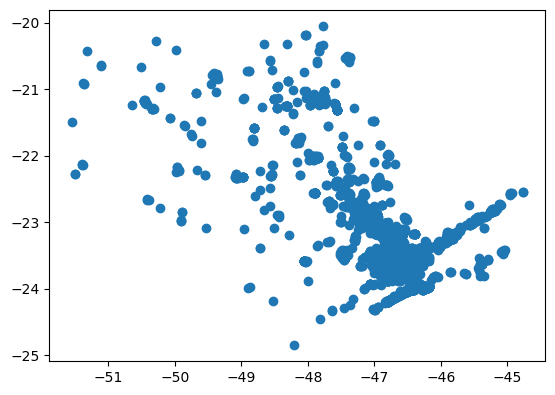

In [16]:
#Mostrar os dados usando a função plot

gdf_roubos.plot()

In [17]:
#Agora vamos ler os dados da capital da grande sao paulo

filename = "E:\HeatMap_RouboSP\municipios_grande_sp.json"
geometria_gsp = gpd.read_file(filename, driver = 'GeoJSON')

geopandas.geodataframe.GeoDataFrame

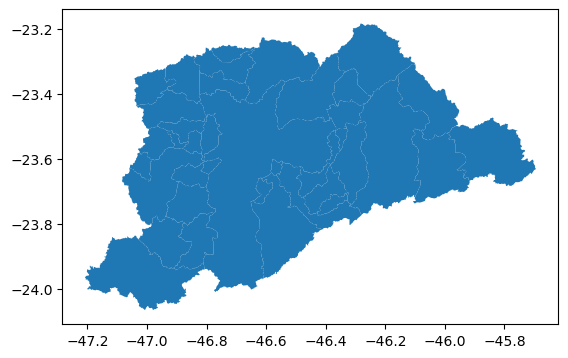

In [21]:
#testando o dado

geometria_gsp.plot()
type(geometria_gsp)

In [22]:
#Para plotar os dois dados juntos, vamos usar a library matplotlib 

#Importar a library matplotlib

import matplotlib.pyplot as plt

<AxesSubplot: >

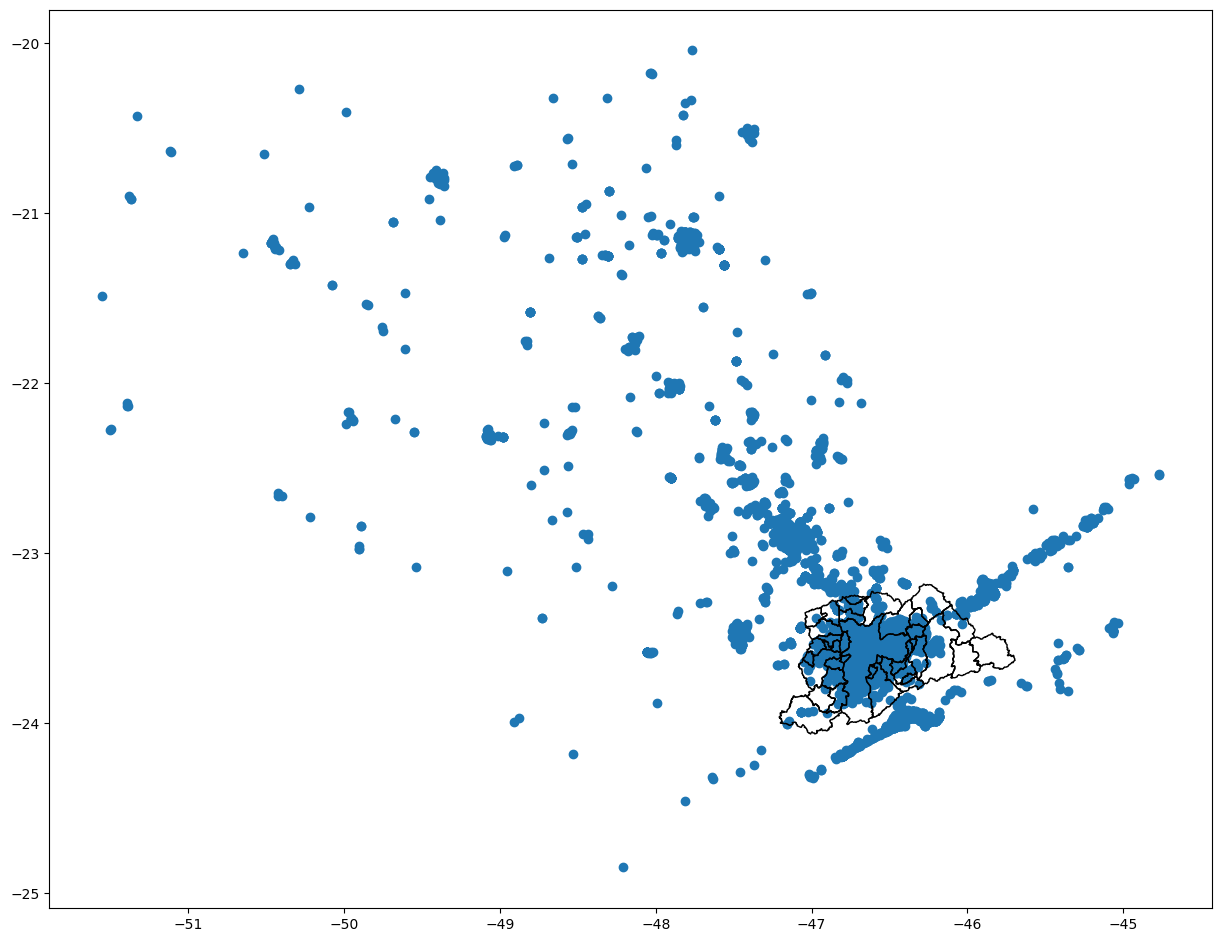

In [24]:
#Mostrando os dados com matplotlib

fig, ax = plt.subplots(figsize = (15,15))

gdf_roubos.plot(ax=ax)

geometria_gsp.plot(ax=ax, facecolor = "None", edgecolor = "black")

In [33]:
#Deixando os dois arquivos no mesmo SRC

# Verifique se o GeoDataFrame tem uma projeção definida

if gdf_roubos.crs is None:
    
    # Se não tiver, defina uma projeção inicial (substitua "EPSG:4326" pela projeção desejada)
    
    gdf_roubos = gdf_roubos.set_crs("EPSG:4326")
    
# Certifique-se de que a geometria é válida

gdf_roubos = gdf_roubos[gdf_roubos.geometry.is_valid]

# Defina a projeção desejada

desired_crs = "EPSG:4326"

# Transforme para a projeção desejada

gdf_roubos = gdf_roubos.to_crs(desired_crs)

In [34]:
# Verifique se o outro GeoDataFrame tem uma projeção definida

if geometria_gsp.crs is None:
    
    # Se não tiver, defina uma projeção inicial (substitua "EPSG:4326" pela projeção desejada)
    
    geometria_gsp = geometria_gsp.set_crs("EPSG:4326")
    
 
 # Certifique-se de que a geometria é válida
geometria_gsp = geometria_gsp[geometria_gsp.geometry.is_valid]

# Defina a projeção desejada
desired_crs = "EPSG:4326"

# Transforme para a projeção desejada
geometria_gsp = geometria_gsp.to_crs(desired_crs)   
    

In [97]:
#Fazer a operação de interseção entre as geometrias

gdf_roubos_gsp = gdf_roubos[gdf_roubos.intersects(geometria_gsp)]

d:\GEODEV\Anaconda\envs\pygeodev\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [99]:
geometria_gsp

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3503901,Arujá,SP,96.167,"POLYGON ((-46.36995 -23.37809, -46.37010 -23.3..."
1,3505708,Barueri,SP,65.701,"POLYGON ((-46.83848 -23.51062, -46.83921 -23.5..."
2,3506607,Biritiba Mirim,SP,317.406,"POLYGON ((-46.09244 -23.56664, -46.09256 -23.5..."
3,3509007,Caieiras,SP,97.642,"POLYGON ((-46.82345 -23.35390, -46.82345 -23.3..."
4,3509205,Cajamar,SP,131.386,"POLYGON ((-46.90468 -23.35731, -46.90538 -23.3..."
5,3510609,Carapicuíba,SP,34.546,"POLYGON ((-46.86204 -23.53778, -46.86212 -23.5..."
6,3513009,Cotia,SP,323.994,"POLYGON ((-46.95689 -23.59103, -46.95678 -23.5..."
7,3513801,Diadema,SP,30.732,"POLYGON ((-46.63342 -23.68345, -46.63343 -23.6..."
8,3515004,Embu das Artes,SP,70.398,"POLYGON ((-46.90857 -23.64150, -46.90906 -23.6..."
9,3515103,Embu-Guaçu,SP,155.641,"POLYGON ((-46.88302 -23.82663, -46.88411 -23.8..."
